In [1]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from scipy.stats import ttest_ind, ttest_rel
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

dataset=sns.load_dataset('tips')
warnings.filterwarnings('ignore')


In [2]:
# Analysis of weather data

In [3]:

## Introduction



In this notebook, we will analyze different data from the `weather.csv` dataset to create a predictive model. The key steps involved in this process are:

1. **Data Loading and Preprocessing**: Load the dataset and clean it to handle missing values, outliers, and other data quality issues.
2. **Exploratory Data Analysis (EDA)**: Perform descriptive statistics and visualize the data to understand the underlying patterns and relationships.
3. **Feature Engineering**: Create new features or modify existing ones to improve the predictive power of the model.
4. **Model Building**: Train and evaluate different machine learning models to identify the best-performing one.
5. **Model Evaluation**: Assess the model's performance using appropriate metrics and validate its generalizability.
6. **Conclusion**: Summarize the findings and discuss potential improvements and future work.

Let's start with loading the dataset and performing some initial analysis.

### Data description

The dataset includes the following columns:
- `District`
- `Latitude`
- `Longitude`
- `Precipitation`
- `Pressure`
- `Humidity`
- `Temperature`
- `Windspeed`


In [4]:
#Loading the dataset from the weather.csv into weatherr

weatherr=pd.read_csv('weather.csv.gz')


In [5]:
#seeing the first few rows of the dataset

weatherr.head()

,Unnamed: 0,Date,District,Latitude,Longitude,Precip,Pressure,Humidity_2m,RH_2m,Temp_2m,...,TempRange_2m,EarthSkinTemp,WindSpeed_10m,MaxWindSpeed_10m,MinWindSpeed_10m,WindSpeedRange_10m,WindSpeed_50m,MaxWindSpeed_50m,MinWindSpeed_50m,WindSpeedRange_50m
0,0,1981-01-01,Arghakhanchi,27.9,83.2,0.00,93.51,4.81,45.41,13.89,...,10.89,11.32,1.89,3.83,0.69,3.14,2.41,4.12,0.73,3.39
1,1,1981-01-02,Arghakhanchi,27.9,83.2,0.00,93.59,4.94,46.78,13.84,...,11.17,11.44,1.72,2.60,1.09,1.50,2.25,3.30,0.96,2.34
2,2,1981-01-03,Arghakhanchi,27.9,83.2,0.03,93.55,5.22,47.91,14.33,...,9.93,12.24,1.80,2.80,0.48,2.32,2.32,3.54,0.39,3.15
3,3,1981-01-04,Arghakhanchi,27.9,83.2,0.02,93.49,5.36,50.83,13.82,...,10.41,12.17,2.18,3.54,1.06,2.49,2.90,4.05,0.93,3.12
4,4,1981-01-05,Arghakhanchi,27.9,83.2,1.84,93.49,5.84,55.55,13.76,...,10.53,12.32,1.96,2.70,0.69,2.02,2.74,4.64,0.96,3.68


In [6]:
weatherr.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
#Descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset's
#distribution, excluding NaN values

weatherr.describe()

,Latitude,Longitude,Precip,Pressure,Humidity_2m,RH_2m,Temp_2m,WetBulbTemp_2m,MaxTemp_2m,MinTemp_2m,TempRange_2m,EarthSkinTemp,WindSpeed_10m,MaxWindSpeed_10m,MinWindSpeed_10m,WindSpeedRange_10m,WindSpeed_50m,MaxWindSpeed_50m,MinWindSpeed_50m,WindSpeedRange_50m
count,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000
mean,27.959677,84.277419,2.433753,82.896390,8.491043,55.657950,15.815832,5.428265,21.856533,11.061186,10.795352,15.539531,2.372512,4.673551,0.666903,4.006641,2.730587,4.643453,0.924084,3.719365
std,0.883261,2.181331,6.160721,10.707984,5.426636,22.877576,9.172463,10.850204,8.848121,9.353420,3.306661,9.924091,0.685488,1.355903,0.510857,1.300380,1.001095,1.509792,0.806458,1.282227
min,26.500000,80.200000,0.000000,54.730000,0.270000,4.040000,-25.440000,-28.190000,-16.940000,-37.240000,1.310000,-33.160000,0.470000,0.970000,0.000000,0.450000,0.650000,1.120000,0.000000,0.450000
25%,27.300000,82.400000,0.000000,77.680000,3.910000,36.540000,10.070000,-2.740000,16.550000,5.410000,8.250000,9.160000,1.900000,3.730000,0.310000,3.070000,2.070000,3.610000,0.400000,2.830000
50%,27.950000,84.300000,0.050000,83.720000,6.750000,54.320000,16.730000,4.980000,22.510000,11.980000,10.920000,16.530000,2.260000,4.520000,0.530000,3.910000,2.510000,4.340000,0.680000,3.520000
75%,28.500000,85.900000,1.870000,92.740000,13.170000,77.160000,22.500000,14.780000,27.940000,17.910000,13.210000,22.880000,2.710000,5.450000,0.870000,4.840000,3.100000,5.310000,1.170000,4.390000
max,30.000000,87.900000,177.790000,100.340000,23.270000,100.000000,38.610000,27.150000,46.820000,32.770000,25.520000,41.510000,13.570000,20.210000,8.360000,16.580000,15.710000,22.850000,10.940000,18.500000


In [8]:
#checking the missing values in the data

weatherr.isnull().sum()

Date                  0
District              0
Latitude              0
Longitude             0
Precip                0
Pressure              0
Humidity_2m           0
RH_2m                 0
Temp_2m               0
WetBulbTemp_2m        0
MaxTemp_2m            0
MinTemp_2m            0
TempRange_2m          0
EarthSkinTemp         0
WindSpeed_10m         0
MaxWindSpeed_10m      0
MinWindSpeed_10m      0
WindSpeedRange_10m    0
WindSpeed_50m         0
MaxWindSpeed_50m      0
MinWindSpeed_50m      0
WindSpeedRange_50m    0
dtype: int64

 since there are no null values or empty values 
 we move on further


In [9]:
#shape is used to check our dimension of our dataframe

weatherr.shape

(883128, 22)

In [50]:
weatherr.duplicated().sum()

0

In [12]:
weatherr.head()

,Date,District,Latitude,Longitude,Precip,Pressure,Humidity_2m,RH_2m,Temp_2m,WetBulbTemp_2m,...,TempRange_2m,EarthSkinTemp,WindSpeed_10m,MaxWindSpeed_10m,MinWindSpeed_10m,WindSpeedRange_10m,WindSpeed_50m,MaxWindSpeed_50m,MinWindSpeed_50m,WindSpeedRange_50m
0,1981-01-01,Arghakhanchi,27.9,83.2,0.00,93.51,4.81,45.41,13.89,2.15,...,10.89,11.32,1.89,3.83,0.69,3.14,2.41,4.12,0.73,3.39
1,1981-01-02,Arghakhanchi,27.9,83.2,0.00,93.59,4.94,46.78,13.84,2.54,...,11.17,11.44,1.72,2.60,1.09,1.50,2.25,3.30,0.96,2.34
2,1981-01-03,Arghakhanchi,27.9,83.2,0.03,93.55,5.22,47.91,14.33,3.32,...,9.93,12.24,1.80,2.80,0.48,2.32,2.32,3.54,0.39,3.15
3,1981-01-04,Arghakhanchi,27.9,83.2,0.02,93.49,5.36,50.83,13.82,3.73,...,10.41,12.17,2.18,3.54,1.06,2.49,2.90,4.05,0.93,3.12
4,1981-01-05,Arghakhanchi,27.9,83.2,1.84,93.49,5.84,55.55,13.76,4.93,...,10.53,12.32,1.96,2.70,0.69,2.02,2.74,4.64,0.96,3.68


In [13]:
#Filters the weatherr DataFrame to create a new DataFrame called kathmandu_df 
#that contains only the rows where the 'District' column has the value 'Kathmandu'.
kathmandu_df=weatherr[weatherr['District']=='Kathmandu']


This is done to filter the weather data to isolate the records for the Kathmandu district
this allows for focused analysis or further processing of weather data specific to Kathmandu

In [14]:
kathmandu_df.head(10)

,Date,District,Latitude,Longitude,Precip,Pressure,Humidity_2m,RH_2m,Temp_2m,WetBulbTemp_2m,...,TempRange_2m,EarthSkinTemp,WindSpeed_10m,MaxWindSpeed_10m,MinWindSpeed_10m,WindSpeedRange_10m,WindSpeed_50m,MaxWindSpeed_50m,MinWindSpeed_50m,WindSpeedRange_50m
413076,1981-01-01,Kathmandu,27.7,85.3,0.00,84.02,4.10,47.94,9.04,-1.96,...,10.98,6.15,1.74,4.35,0.50,3.85,1.75,3.71,0.68,3.03
413077,1981-01-02,Kathmandu,27.7,85.3,0.00,84.08,4.25,49.83,9.00,-1.47,...,10.06,6.06,1.53,3.96,0.35,3.62,1.48,3.21,0.33,2.88
413078,1981-01-03,Kathmandu,27.7,85.3,0.00,84.04,4.72,55.99,8.84,0.11,...,9.41,6.58,1.71,3.70,0.49,3.21,1.80,3.14,0.65,2.49
413079,1981-01-04,Kathmandu,27.7,85.3,0.01,83.96,4.78,60.71,7.81,0.27,...,9.32,6.16,1.86,4.01,0.61,3.40,1.98,3.48,0.89,2.59
413080,1981-01-05,Kathmandu,27.7,85.3,0.34,83.96,4.67,60.83,7.42,-0.08,...,9.21,5.91,1.82,3.75,0.37,3.38,2.04,3.44,0.49,2.95
413081,1981-01-06,Kathmandu,27.7,85.3,0.35,83.85,4.63,61.22,7.21,-0.37,...,10.11,5.82,1.91,4.30,0.48,3.82,2.11,3.94,0.42,3.52
413082,1981-01-07,Kathmandu,27.7,85.3,1.19,83.86,5.10,79.23,4.86,0.95,...,6.18,4.29,1.37,2.24,0.38,1.87,1.61,2.97,0.52,2.45
413083,1981-01-08,Kathmandu,27.7,85.3,0.39,83.95,4.16,63.34,5.19,-1.98,...,10.36,3.56,1.70,3.63,0.30,3.34,1.80,3.06,0.50,2.56
413084,1981-01-09,Kathmandu,27.7,85.3,0.04,84.23,3.71,56.06,5.34,-3.48,...,10.00,3.12,1.78,4.09,0.43,3.66,1.74,3.29,0.58,2.71
413085,1981-01-10,Kathmandu,27.7,85.3,0.00,84.41,3.41,46.95,6.70,-4.55,...,10.32,3.69,1.44,3.70,0.19,3.51,1.44,2.99,0.28,2.71


In [52]:
# To see all the columns in the dataframe
kathmandu_df.columns.tolist()


['Date',
 'Pressure',
 'Humidity_2m',
 'RH_2m',
 'Temp_2m',
 'WetBulbTemp_2m',
 'MaxTemp_2m',
 'MinTemp_2m',
 'TempRange_2m',
 'EarthSkinTemp',
 'WindSpeed_10m',
 'MaxWindSpeed_10m',
 'MinWindSpeed_10m',
 'WindSpeedRange_10m',
 'WindSpeed_50m',
 'MaxWindSpeed_50m',
 'MinWindSpeed_50m',
 'WindSpeedRange_50m',
 'Log_Sqrt_Precip']

In [16]:
# droping the columns District Latitude and Longitude as they are not 
kathmandu_df = kathmandu_df.drop(columns=['District','Latitude','Longitude'])


In [17]:
kathmandu_df.head(10)

,Date,Precip,Pressure,Humidity_2m,RH_2m,Temp_2m,WetBulbTemp_2m,MaxTemp_2m,MinTemp_2m,TempRange_2m,EarthSkinTemp,WindSpeed_10m,MaxWindSpeed_10m,MinWindSpeed_10m,WindSpeedRange_10m,WindSpeed_50m,MaxWindSpeed_50m,MinWindSpeed_50m,WindSpeedRange_50m
413076,1981-01-01,0.00,84.02,4.10,47.94,9.04,-1.96,15.71,4.73,10.98,6.15,1.74,4.35,0.50,3.85,1.75,3.71,0.68,3.03
413077,1981-01-02,0.00,84.08,4.25,49.83,9.00,-1.47,15.26,5.20,10.06,6.06,1.53,3.96,0.35,3.62,1.48,3.21,0.33,2.88
413078,1981-01-03,0.00,84.04,4.72,55.99,8.84,0.11,14.81,5.40,9.41,6.58,1.71,3.70,0.49,3.21,1.80,3.14,0.65,2.49
413079,1981-01-04,0.01,83.96,4.78,60.71,7.81,0.27,13.65,4.33,9.32,6.16,1.86,4.01,0.61,3.40,1.98,3.48,0.89,2.59
413080,1981-01-05,0.34,83.96,4.67,60.83,7.42,-0.08,12.99,3.78,9.21,5.91,1.82,3.75,0.37,3.38,2.04,3.44,0.49,2.95
413081,1981-01-06,0.35,83.85,4.63,61.22,7.21,-0.37,13.34,3.22,10.11,5.82,1.91,4.30,0.48,3.82,2.11,3.94,0.42,3.52
413082,1981-01-07,1.19,83.86,5.10,79.23,4.86,0.95,8.51,2.34,6.18,4.29,1.37,2.24,0.38,1.87,1.61,2.97,0.52,2.45
413083,1981-01-08,0.39,83.95,4.16,63.34,5.19,-1.98,11.59,1.24,10.36,3.56,1.70,3.63,0.30,3.34,1.80,3.06,0.50,2.56
413084,1981-01-09,0.04,84.23,3.71,56.06,5.34,-3.48,11.56,1.57,10.00,3.12,1.78,4.09,0.43,3.66,1.74,3.29,0.58,2.71
413085,1981-01-10,0.00,84.41,3.41,46.95,6.70,-4.55,13.07,2.75,10.32,3.69,1.44,3.70,0.19,3.51,1.44,2.99,0.28,2.71


In [18]:
kathmandu_df.describe()

,Precip,Pressure,Humidity_2m,RH_2m,Temp_2m,WetBulbTemp_2m,MaxTemp_2m,MinTemp_2m,TempRange_2m,EarthSkinTemp,WindSpeed_10m,MaxWindSpeed_10m,MinWindSpeed_10m,WindSpeedRange_10m,WindSpeed_50m,MaxWindSpeed_50m,MinWindSpeed_50m,WindSpeedRange_50m
count,14244.000000,14244.000000,14244.000000,14244.000000,14244.000000,14244.000000,14244.000000,14244.000000,14244.000000,14244.000000,14244.000000,14244.000000,14244.000000,14244.000000,14244.000000,14244.000000,14244.000000,14244.000000
mean,2.326257,83.897358,8.690465,55.418611,16.860930,6.175465,22.588764,12.476985,10.111745,16.430837,2.144012,4.486184,0.522755,3.963451,2.285709,4.048641,0.706875,3.341729
std,5.304442,0.357803,5.153337,23.710547,5.135011,9.490372,4.663958,5.282171,2.994041,6.584987,0.479650,0.924621,0.299151,0.881278,0.558008,0.993769,0.419942,0.933777
min,0.000000,82.680000,0.960000,5.180000,2.520000,-16.430000,6.410000,-2.010000,2.610000,0.510000,0.810000,1.480000,0.000000,0.880000,0.900000,1.580000,0.010000,0.740000
25%,0.000000,83.620000,4.010000,35.087500,12.370000,-2.120000,18.827500,7.910000,7.710000,10.320000,1.770000,3.830000,0.300000,3.340000,1.870000,3.350000,0.390000,2.680000
50%,0.050000,83.920000,7.035000,52.635000,18.270000,5.585000,23.110000,13.200000,10.310000,18.295000,2.080000,4.440000,0.480000,3.940000,2.215000,3.950000,0.640000,3.250000
75%,2.020000,84.180000,14.300000,78.762500,21.130000,16.312500,25.970000,17.500000,12.350000,21.920000,2.490000,5.120000,0.700000,4.560000,2.630000,4.630000,0.940000,3.910000
max,68.690000,84.980000,18.630000,98.340000,27.130000,20.530000,34.330000,21.320000,18.120000,29.220000,5.640000,9.530000,3.600000,8.500000,6.600000,10.490000,4.470000,8.930000


In [19]:
### since we dont have any 

# EDA Exploratory data analysis

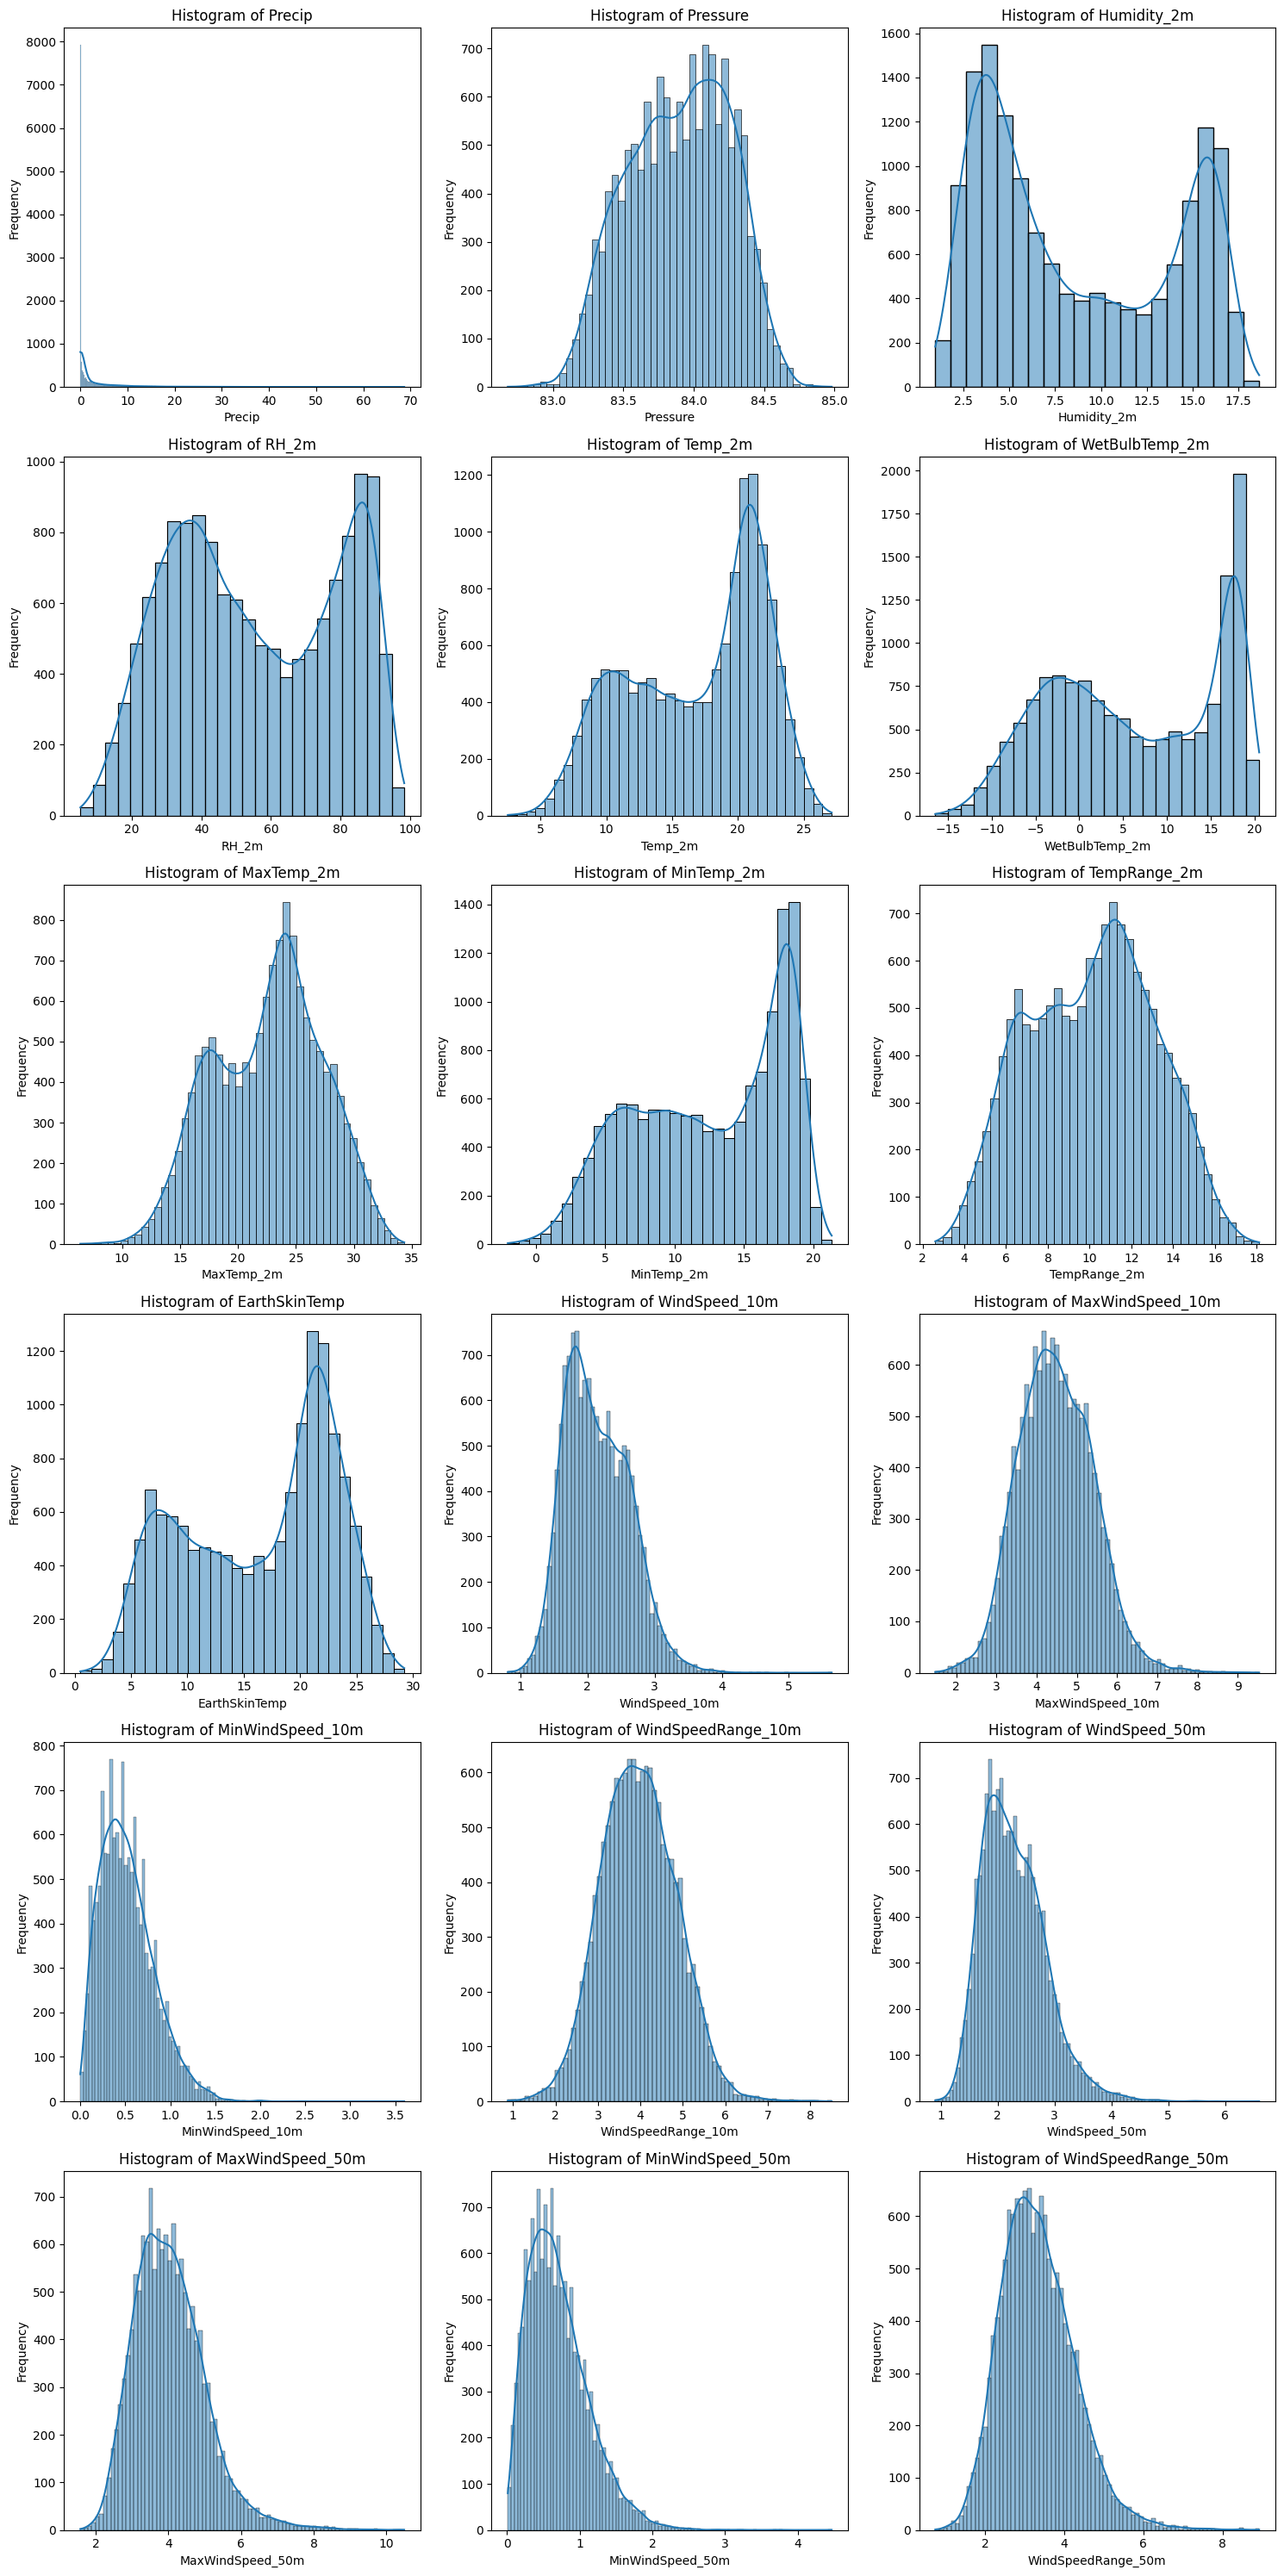

In [20]:
# Get numeric column names from the DataFrame
numeric_columns = kathmandu_df.select_dtypes(include=['number']).columns

# Determine the number of rows needed
num_columns = len(numeric_columns)
num_rows = (num_columns + 2) // 3  # 3 plots per row

# Create a figure with multiple subplots
plt.figure(figsize=(15, num_rows * 5))

# Plot histograms for each numeric column
for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, 3, i + 1)  # i + 1 because subplot indices start at 1
    sns.histplot(kathmandu_df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')



plt.tight_layout()
plt.show()


In [21]:
kathmandu_df['Log_Sqrt_Precip'] = np.log1p(np.sqrt(kathmandu_df['Precip']))
kathmandu_df = kathmandu_df.drop(columns=['Precip'])

              Date  Pressure  Humidity_2m  RH_2m  Temp_2m  WetBulbTemp_2m  \
413076  1981-01-01     84.02         4.10  47.94     9.04           -1.96   
413077  1981-01-02     84.08         4.25  49.83     9.00           -1.47   
413078  1981-01-03     84.04         4.72  55.99     8.84            0.11   
413079  1981-01-04     83.96         4.78  60.71     7.81            0.27   
413080  1981-01-05     83.96         4.67  60.83     7.42           -0.08   

        MaxTemp_2m  MinTemp_2m  TempRange_2m  EarthSkinTemp  WindSpeed_10m  \
413076       15.71        4.73         10.98           6.15           1.74   
413077       15.26        5.20         10.06           6.06           1.53   
413078       14.81        5.40          9.41           6.58           1.71   
413079       13.65        4.33          9.32           6.16           1.86   
413080       12.99        3.78          9.21           5.91           1.82   

        MaxWindSpeed_10m  MinWindSpeed_10m  WindSpeedRange_10m  Wind

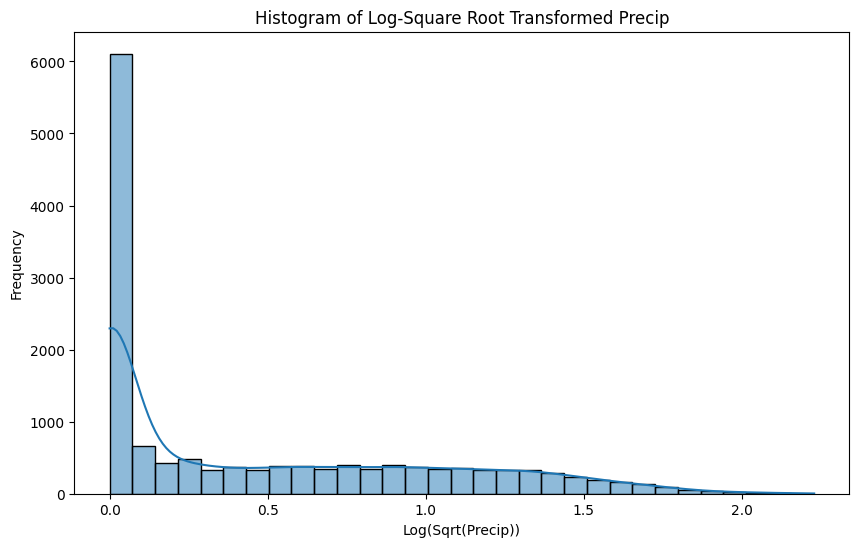

In [22]:
# Verify the column exists in the DataFrame
print(kathmandu_df.head())

# Plotting the combined transformed data
plt.figure(figsize=(10, 6))
sns.histplot(kathmandu_df['Log_Sqrt_Precip'], kde=True)
plt.title('Histogram of Log-Square Root Transformed Precip')
plt.xlabel('Log(Sqrt(Precip))')
plt.ylabel('Frequency')
plt.show()

In [23]:
columns_with_outliers = [
    'Log_Sqrt_Precip', 'WindSpeed_10m', 'MaxWindSpeed_10m', 'MinWindSpeed_10m', 
    'WindSpeedRange_10m', 'WindSpeed_50m', 'MaxWindSpeed_50m', 
    'MinWindSpeed_50m', 'WindSpeedRange_50m'
]

# Define the z-score threshold for 95% confidence
z_threshold = 1.96

for col in columns_with_outliers:
    # Calculate the mean and standard deviation
    means = kathmandu_df[col].mean()
    stds = kathmandu_df[col].std()

    # Calculate upper and lower limits using the z-score
    upper_limit = means + z_threshold * stds
    lower_limit = means - z_threshold * stds

    print(f'{col} - Upper limit: {upper_limit}, Lower limit: {lower_limit}')

    # Identify outliers
    outliers = kathmandu_df[
        (kathmandu_df[col] > upper_limit) |
        (kathmandu_df[col] < lower_limit)
    ]

    print(f'{col} - Outliers:\n', outliers)

Log_Sqrt_Precip - Upper limit: 1.5281194747109308, Lower limit: -0.601996420356138
Log_Sqrt_Precip - Outliers:
               Date  Pressure  Humidity_2m  RH_2m  Temp_2m  WetBulbTemp_2m  \
413181  1981-04-16     83.78        10.75  67.09    18.60           11.91   
413211  1981-05-16     83.45        10.52  58.78    20.32           11.39   
413222  1981-05-27     83.65        12.98  71.21    20.63           14.87   
413254  1981-06-28     83.63        15.74  85.75    20.71           17.81   
413255  1981-06-29     83.52        15.99  85.60    20.97           18.02   
...            ...       ...          ...    ...      ...             ...   
427214  2019-09-17     83.94        15.99  94.45    19.46           18.03   
427215  2019-09-18     84.24        14.53  94.84    17.94           16.61   
427222  2019-09-25     84.52        14.59  95.80    17.90           16.83   
427263  2019-11-05     84.01         9.49  80.68    13.80            9.97   
427301  2019-12-13     84.43         6.53

In [24]:
columns_with_outliers = [
    'Log_Sqrt_Precip', 'WindSpeed_10m', 'MaxWindSpeed_10m', 'MinWindSpeed_10m', 
    'WindSpeedRange_10m', 'WindSpeed_50m', 'MaxWindSpeed_50m', 
    'MinWindSpeed_50m', 'WindSpeedRange_50m'
]

# Define the z-score threshold for 95% confidence
z_threshold = 1.96

# Handle outliers for each column
for col in columns_with_outliers:
    # Calculate the mean and standard deviation
    means = kathmandu_df[col].mean()
    stds = kathmandu_df[col].std()

    # Calculate upper and lower limits using the z-score
    upper_limit = means + z_threshold * stds
    lower_limit = means - z_threshold * stds

    # Clip the outliers for the column
    kathmandu_df[col] = kathmandu_df[col].clip(lower=lower_limit, upper=upper_limit)

    print(f'{col} - Upper limit: {upper_limit}, Lower limit: {lower_limit}')
    print(f'{col} - Data with capped outliers:\n', kathmandu_df[[col]].head())

print('Data with capped outliers for all columns:')
print(kathmandu_df.head())

Log_Sqrt_Precip - Upper limit: 1.5281194747109308, Lower limit: -0.601996420356138
Log_Sqrt_Precip - Data with capped outliers:
         Log_Sqrt_Precip
413076         0.000000
413077         0.000000
413078         0.000000
413079         0.095310
413080         0.459382
WindSpeed_10m - Upper limit: 3.0841266897867947, Lower limit: 1.2038977415527161
WindSpeed_10m - Data with capped outliers:
         WindSpeed_10m
413076           1.74
413077           1.53
413078           1.71
413079           1.86
413080           1.82
MaxWindSpeed_10m - Upper limit: 6.29844162834498, Lower limit: 2.6739270883076447
MaxWindSpeed_10m - Data with capped outliers:
         MaxWindSpeed_10m
413076              4.35
413077              3.96
413078              3.70
413079              4.01
413080              3.75
MinWindSpeed_10m - Upper limit: 1.1090900722156536, Lower limit: -0.0635803839258472
MinWindSpeed_10m - Data with capped outliers:
         MinWindSpeed_10m
413076              0.50
413077   

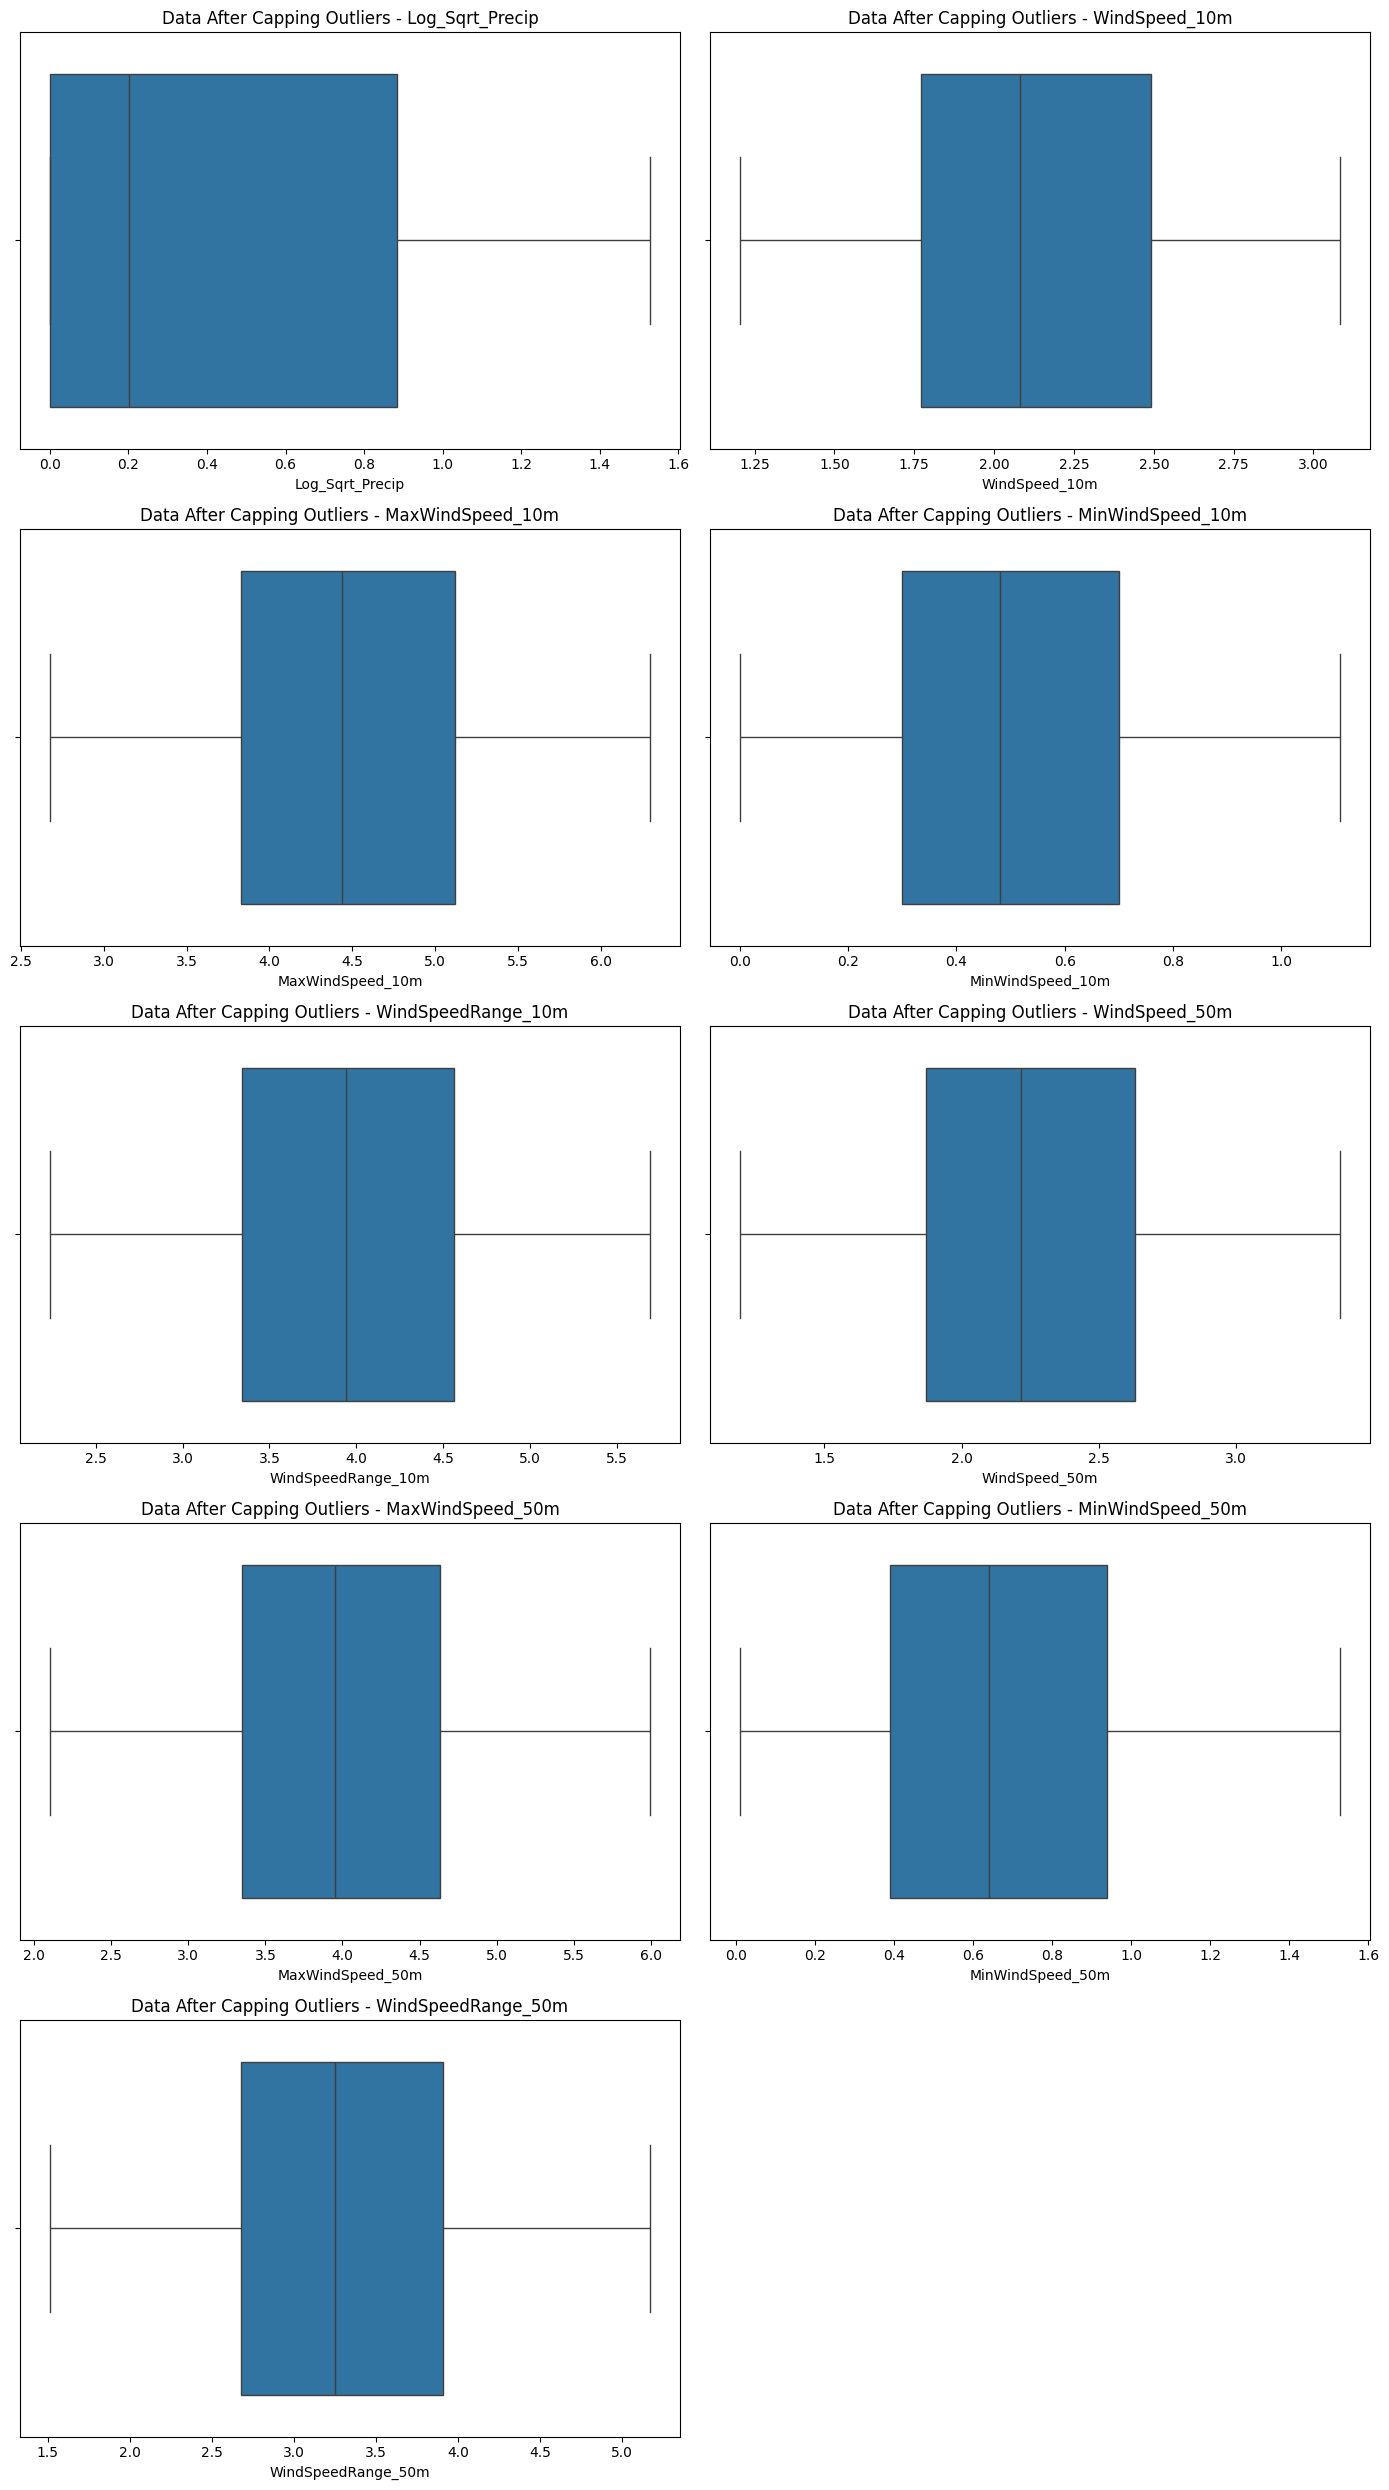

In [25]:
# Determine the number of rows and columns for the subplot grid
num_cols = len(columns_with_outliers)
num_rows = (num_cols + 1) // 2  # Two columns per row, adjust as needed

# Plot boxplots before and after capping outliers
plt.figure(figsize=(14, num_rows * 5))

for i, col in enumerate(columns_with_outliers, 1):
    plt.subplot(num_rows, 2, i)
    sns.boxplot(x=kathmandu_df[col])
    plt.title(f'Data After Capping Outliers - {col}')

plt.tight_layout()
plt.show()




In [26]:
df=kathmandu_df

In [27]:
df = df.set_index('Date')


In [28]:
corr_matrix=df.corr()

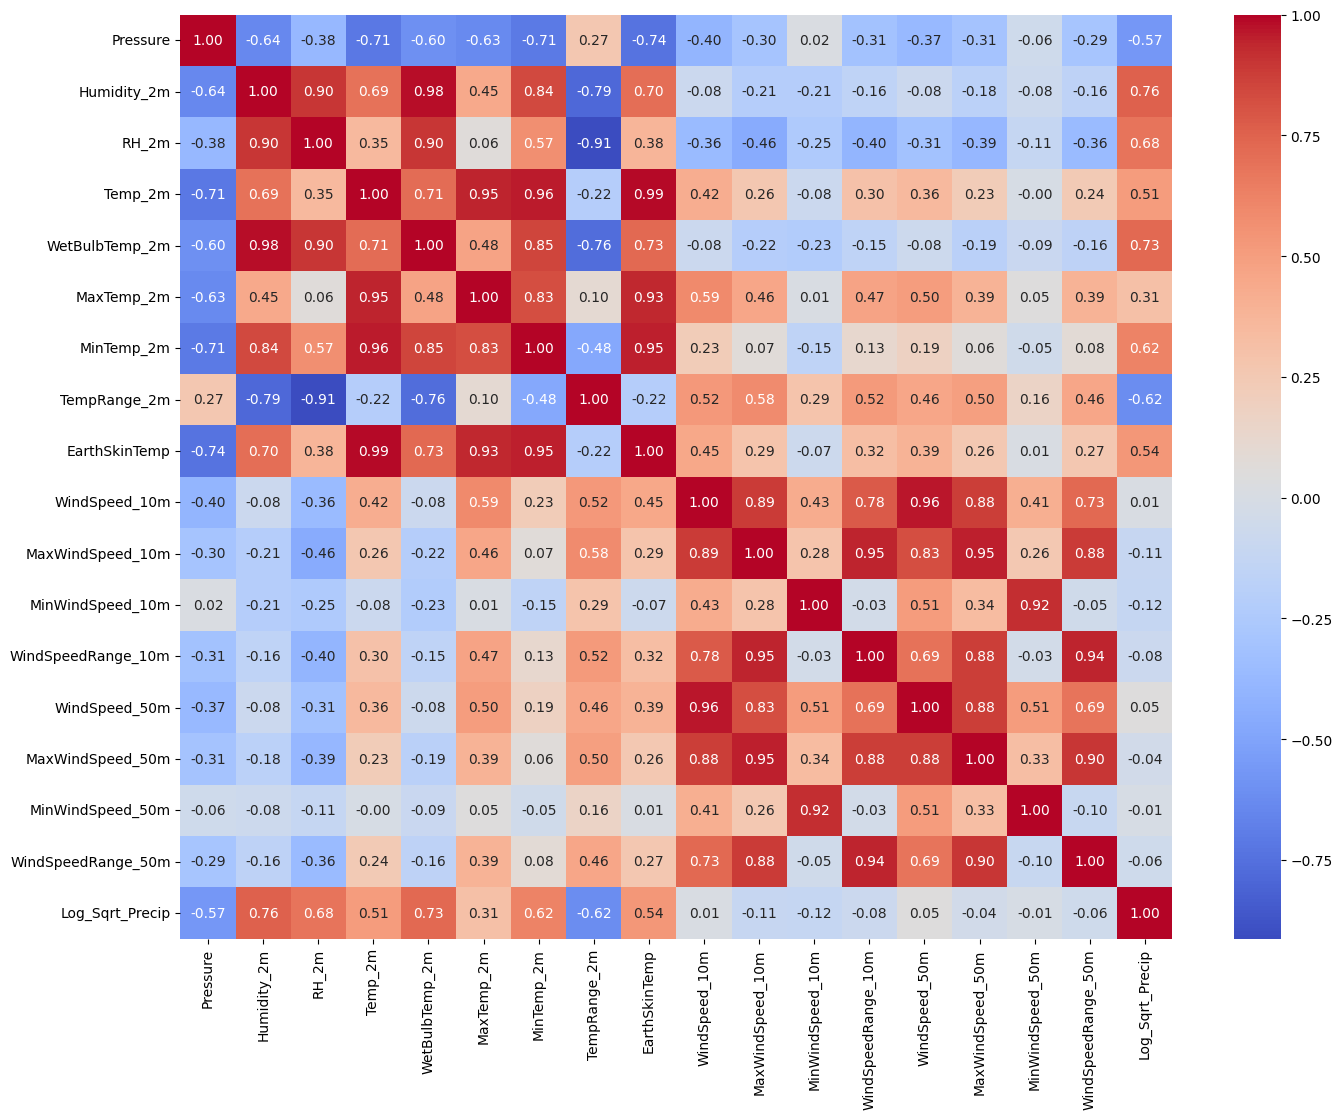

In [29]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Show the plot
plt.show()

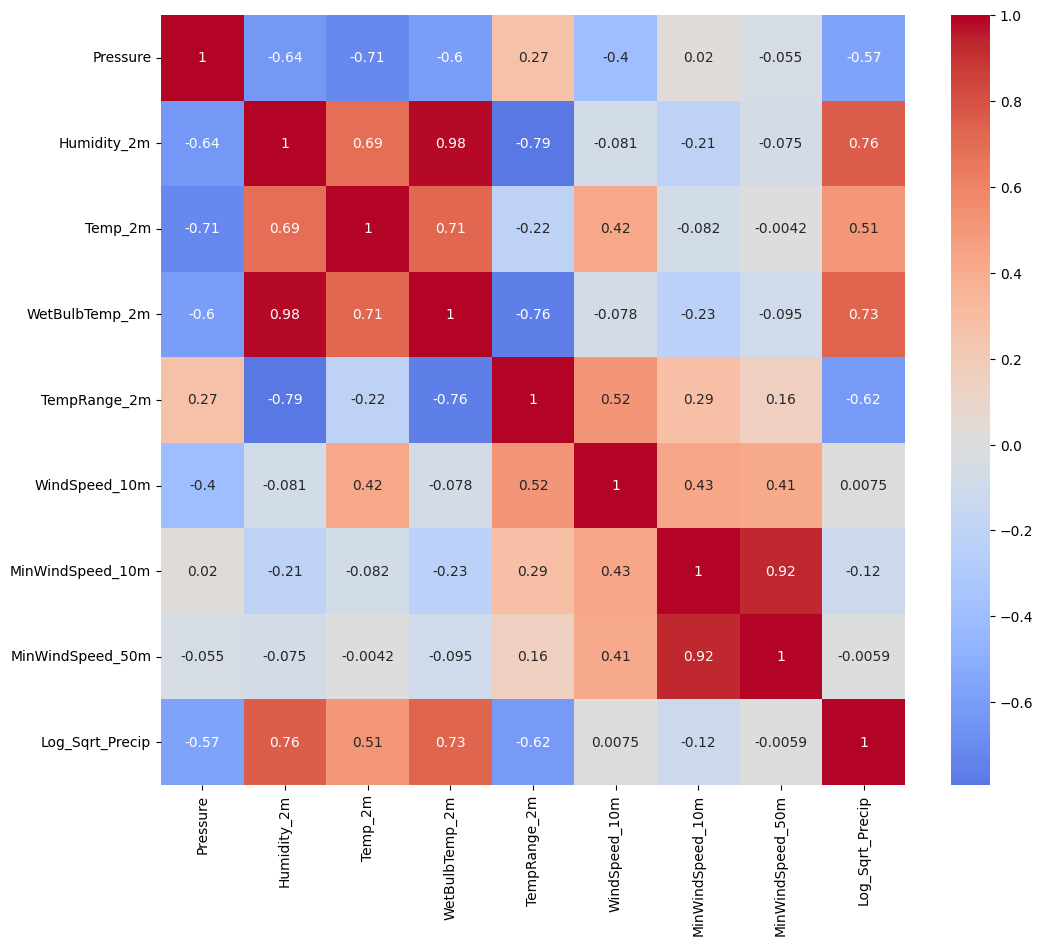

In [30]:
columns_to_drop = [
    'EarthSkinTemp', 'MaxTemp_2m', 'RH_2m', 'MinTemp_2m', 
    'WindSpeedRange_10m', 'WindSpeedRange_50m', 'WindSpeed_50m', 
    'MaxWindSpeed_10m', 'MaxWindSpeed_50m'
]

# Drop the columns
df_cleaned = df.drop(columns=columns_to_drop)



correlation_matrix = df_cleaned.corr()
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# Show the plot
plt.show()

In [31]:
df_cleaned.head(10)

,Pressure,Humidity_2m,Temp_2m,WetBulbTemp_2m,TempRange_2m,WindSpeed_10m,MinWindSpeed_10m,MinWindSpeed_50m,Log_Sqrt_Precip
Date,,,,,,,,,
1981-01-01,84.02,4.10,9.04,-1.96,10.98,1.74,0.50,0.68,0.000000
1981-01-02,84.08,4.25,9.00,-1.47,10.06,1.53,0.35,0.33,0.000000
1981-01-03,84.04,4.72,8.84,0.11,9.41,1.71,0.49,0.65,0.000000
1981-01-04,83.96,4.78,7.81,0.27,9.32,1.86,0.61,0.89,0.095310
1981-01-05,83.96,4.67,7.42,-0.08,9.21,1.82,0.37,0.49,0.459382
1981-01-06,83.85,4.63,7.21,-0.37,10.11,1.91,0.48,0.42,0.464745
1981-01-07,83.86,5.10,4.86,0.95,6.18,1.37,0.38,0.52,0.737581
1981-01-08,83.95,4.16,5.19,-1.98,10.36,1.70,0.30,0.50,0.485200
1981-01-09,84.23,3.71,5.34,-3.48,10.00,1.78,0.43,0.58,0.182322


In [32]:
# List of additional columns to drop
columns_to_drop_from_cleaned = [
    'Precip', 
    'WetBulbTemp_2m', 
    'Temp_2m', 
    'MinWindSpeed_50m'
]

# Drop the specified columns from df_cleaned
df_cleanedd = df_cleaned.drop(columns=columns_to_drop_from_cleaned, errors='ignore')


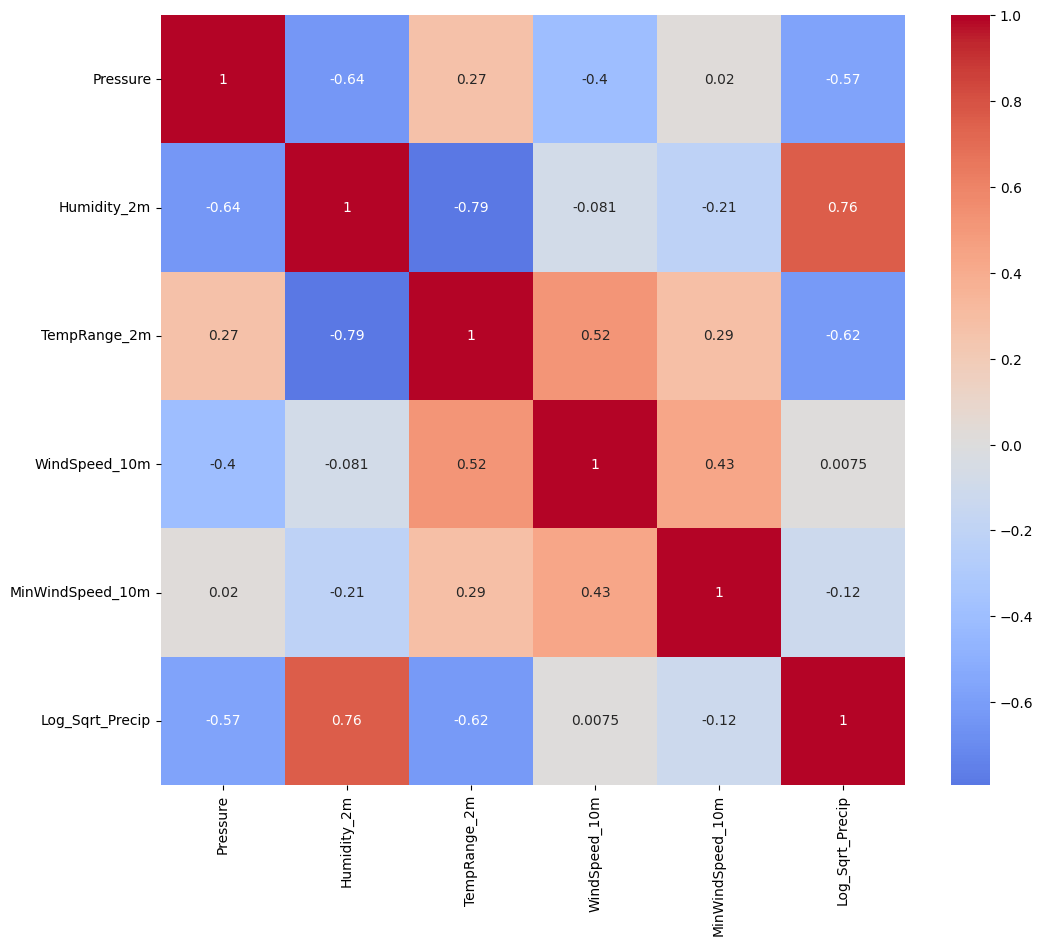

In [33]:
correlation_matrix = df_cleanedd.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# Show the plot
plt.show()

In [34]:
df=df_cleanedd


# FEATURE ENGINEERING


I want to implement different features so that the model becomes more accurate 
- Temporal features = season
- Lag features
- Rolling statistics

TEMPORAL FEATURES

In [35]:
df = df.reset_index()
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
# Define a function to determine the season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# Apply the function to the Date column
df['Season'] = df['Date'].dt.month.apply(get_season)





LAG FEATURES



In [36]:
df = df.set_index('Date')


In [37]:
# Create lag features for selected columns
num_lags = 3
for feature in ['Log_Sqrt_Precip', 'Pressure', 'Humidity_2m', 'TempRange_2m', 'WindSpeed_10m']:
    for lag in range(1, num_lags + 1):
        df[f'{feature}_lag_{lag}'] = df[feature].shift(lag)

# Create lag features for 'season'
for lag in range(1, num_lags + 1):
    df[f'season_lag_{lag}'] = df['Season'].shift(lag)

# Drop rows with NaN values
df.dropna(inplace=True)

print(df)

            Pressure  Humidity_2m  TempRange_2m  WindSpeed_10m  \
Date                                                             
1981-01-04     83.96         4.78          9.32           1.86   
1981-01-05     83.96         4.67          9.21           1.82   
1981-01-06     83.85         4.63         10.11           1.91   
1981-01-07     83.86         5.10          6.18           1.37   
1981-01-08     83.95         4.16         10.36           1.70   
...              ...          ...           ...            ...   
2019-12-27     84.01         3.32         10.81           1.85   
2019-12-28     84.27         3.14         14.46           2.16   
2019-12-29     84.33         3.33         10.43           1.76   
2019-12-30     84.39         3.36         10.50           1.63   
2019-12-31     84.51         3.20          8.88           1.54   

            MinWindSpeed_10m  Log_Sqrt_Precip  Season  Log_Sqrt_Precip_lag_1  \
Date                                                         

In [38]:
column_names = df.columns.tolist()
print(column_names)

['Pressure', 'Humidity_2m', 'TempRange_2m', 'WindSpeed_10m', 'MinWindSpeed_10m', 'Log_Sqrt_Precip', 'Season', 'Log_Sqrt_Precip_lag_1', 'Log_Sqrt_Precip_lag_2', 'Log_Sqrt_Precip_lag_3', 'Pressure_lag_1', 'Pressure_lag_2', 'Pressure_lag_3', 'Humidity_2m_lag_1', 'Humidity_2m_lag_2', 'Humidity_2m_lag_3', 'TempRange_2m_lag_1', 'TempRange_2m_lag_2', 'TempRange_2m_lag_3', 'WindSpeed_10m_lag_1', 'WindSpeed_10m_lag_2', 'WindSpeed_10m_lag_3', 'season_lag_1', 'season_lag_2', 'season_lag_3']


In [39]:
# Define window sizes for different trends
window_sizes = {
    'TempRange_2m': [7, 30, 90, 365],  # Weekly, monthly, quarterly, yearly
    'Log_Sqrt_Precip': [7, 30, 90, 365],
    'Pressure': [7, 30, 90, 365],
    'Humidity_2m': [7, 30, 90, 365],
    'WindSpeed_10m': [7, 30, 90, 365]
}

# Apply rolling mean for each column and window size
for column, sizes in window_sizes.items():
    for size in sizes:
        df[f'{column}_rolling_mean_{size}'] = df[column].rolling(window=size).mean()

# Optionally, handle NaN values
# For example, fill NaN values with the forward fill method
df.fillna(method='bfill', inplace=True)  # or use 'bfill' for backward fill

# Print the updated DataFrame to verify
print(df.head())

            Pressure  Humidity_2m  TempRange_2m  WindSpeed_10m  \
Date                                                             
1981-01-04     83.96         4.78          9.32           1.86   
1981-01-05     83.96         4.67          9.21           1.82   
1981-01-06     83.85         4.63         10.11           1.91   
1981-01-07     83.86         5.10          6.18           1.37   
1981-01-08     83.95         4.16         10.36           1.70   

            MinWindSpeed_10m  Log_Sqrt_Precip  Season  Log_Sqrt_Precip_lag_1  \
Date                                                                           
1981-01-04              0.61         0.095310  Winter               0.000000   
1981-01-05              0.37         0.459382  Winter               0.095310   
1981-01-06              0.48         0.464745  Winter               0.459382   
1981-01-07              0.38         0.737581  Winter               0.464745   
1981-01-08              0.30         0.485200  Winter    

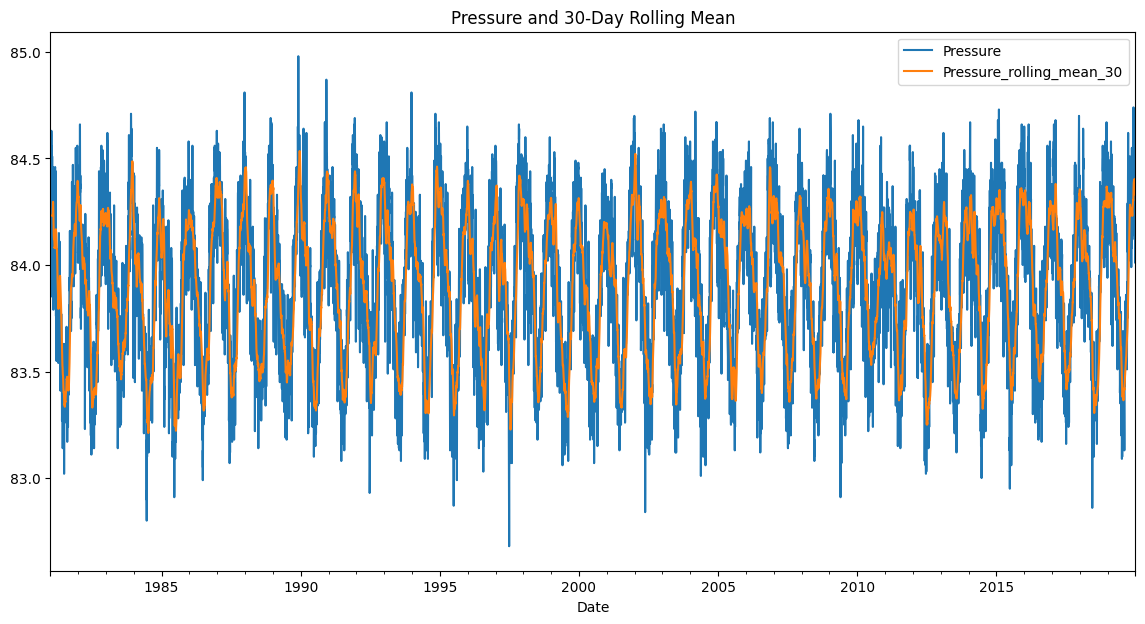

In [40]:
df[['Pressure', 'Pressure_rolling_mean_30']].plot(figsize=(14, 7))
plt.title('Pressure and 30-Day Rolling Mean')
plt.show()

In [41]:
df.head

<bound method NDFrame.head of             Pressure  Humidity_2m  TempRange_2m  WindSpeed_10m  \
Date                                                             
1981-01-04     83.96         4.78          9.32           1.86   
1981-01-05     83.96         4.67          9.21           1.82   
1981-01-06     83.85         4.63         10.11           1.91   
1981-01-07     83.86         5.10          6.18           1.37   
1981-01-08     83.95         4.16         10.36           1.70   
...              ...          ...           ...            ...   
2019-12-27     84.01         3.32         10.81           1.85   
2019-12-28     84.27         3.14         14.46           2.16   
2019-12-29     84.33         3.33         10.43           1.76   
2019-12-30     84.39         3.36         10.50           1.63   
2019-12-31     84.51         3.20          8.88           1.54   

            MinWindSpeed_10m  Log_Sqrt_Precip  Season  Log_Sqrt_Precip_lag_1  \
Date                           

In [42]:
df = df.reset_index()

In [43]:
df.head

if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')

# Ensure the index is a datetime index with a frequency set
df = df.asfreq('D')

In [44]:
from statsmodels.tsa.stattools import adfuller

# Defining the columns to test
columns = ['Log_Sqrt_Precip', 'Pressure', 'Humidity_2m', 'TempRange_2m', 'WindSpeed_10m']

# Function to perform ADF test and print results
def perform_adf_test(series):
    result = adfuller(series.dropna(), autolag='AIC')  # Drop missing values and select lag
    adf_statistic = result[0]
    p_value = result[1]
    critical_values = result[4]

    print(f'ADF Statistic: {adf_statistic}')
    print(f'p-value: {p_value}')
    print(f'Critical Values: {critical_values}')
    
# Interpretation
    if p_value < 0.05:
        print('The series is likely stationary.')
    else:
        print('The series is likely non-stationary.')
    print('')

# Apply the ADF test to each column
for column in columns:
    print(f'Performing ADF test for column: {column}')
    perform_adf_test(df[column])

Performing ADF test for column: Log_Sqrt_Precip
ADF Statistic: -8.429197094337482
p-value: 1.8902724877530494e-13
Critical Values: {'1%': -3.4308101112387184, '5%': -2.8617433484384476, '10%': -2.5668782376087345}
The series is likely stationary.

Performing ADF test for column: Pressure
ADF Statistic: -8.55830654179944
p-value: 8.8352356991215e-14
Critical Values: {'1%': -3.430810662253362, '5%': -2.8617435919432066, '10%': -2.566878367223888}
The series is likely stationary.

Performing ADF test for column: Humidity_2m
ADF Statistic: -11.3887334468057
p-value: 8.167080246742333e-21
Critical Values: {'1%': -3.430810662253362, '5%': -2.8617435919432066, '10%': -2.566878367223888}
The series is likely stationary.

Performing ADF test for column: TempRange_2m
ADF Statistic: -9.551271430030736
p-value: 2.5680268906967376e-16
Critical Values: {'1%': -3.430810662253362, '5%': -2.8617435919432066, '10%': -2.566878367223888}
The series is likely stationary.

Performing ADF test for column: Wi

In [45]:
target_vars = ['Pressure', 'Humidity_2m', 'TempRange_2m', 'WindSpeed_10m', 'MinWindSpeed_10m', 'Log_Sqrt_Precip']

In [46]:
# Initialize TimeSeriesSplit
n_splits = 5 # Adjust this number based on your needs
tscv = TimeSeriesSplit(n_splits=n_splits)

In [47]:

# Store MSE for each split and each target
mse_scores = {target: [] for target in target_vars}

#Iterate through each split
for i, (train_index, test_index) in enumerate(tscv.split(df)):
    train, test = df.iloc[train_index], df.iloc[test_index]

    for target in target_vars:
        train_series = train[target]
        test_series = test[target]

        # Fit ARIMA model on the training set
        model = ARIMA(train_series, order=(5, 1, 0))  # Adjust the order as needed
        model_fit = model.fit()

        # Forecasting
        predictions = model_fit.forecast(steps=len(test_series))

        # Calculate MSE
        mse = mean_squared_error(test_series, predictions)
        mse_scores[target].append(mse)

        # Print the results
        print(f"Split {i + 1}, Target: {target}, Mean Squared Error: {mse}")

# Print average MSE for each target
for target in target_vars:
    average_mse = np.mean(mse_scores[target])
    print(f'Average Mean Squared Error for {target} across all splits: {average_mse}')
     

Split 1, Target: Pressure, Mean Squared Error: 0.42170069751555483
Split 1, Target: Humidity_2m, Mean Squared Error: 76.1446499404092
Split 1, Target: TempRange_2m, Mean Squared Error: 18.939500586821904
Split 1, Target: WindSpeed_10m, Mean Squared Error: 0.28685915569646553
Split 1, Target: MinWindSpeed_10m, Mean Squared Error: 0.11465579316561152
Split 1, Target: Log_Sqrt_Precip, Mean Squared Error: 1.1174266960281156
Split 2, Target: Pressure, Mean Squared Error: 0.29944252233117796
Split 2, Target: Humidity_2m, Mean Squared Error: 51.155661900661755
Split 2, Target: TempRange_2m, Mean Squared Error: 9.343362669747886
Split 2, Target: WindSpeed_10m, Mean Squared Error: 0.22937776307046154
Split 2, Target: MinWindSpeed_10m, Mean Squared Error: 0.12880315865217504
Split 2, Target: Log_Sqrt_Precip, Mean Squared Error: 0.35777497739664665
Split 3, Target: Pressure, Mean Squared Error: 0.30803986971812114
Split 3, Target: Humidity_2m, Mean Squared Error: 72.62128199093783
Split 3, Target

Forecasted values for Pressure for the next 30 steps:
2020-01-01    84.504762
2020-01-02    84.422196
2020-01-03    84.386953
2020-01-04    84.395167
2020-01-05    84.402843
2020-01-06    84.409860
2020-01-07    84.419437
2020-01-08    84.421853
2020-01-09    84.417006
2020-01-10    84.413061
2020-01-11    84.412391
2020-01-12    84.412811
2020-01-13    84.413470
2020-01-14    84.414299
2020-01-15    84.414694
2020-01-16    84.414480
2020-01-17    84.414141
2020-01-18    84.413989
2020-01-19    84.413978
2020-01-20    84.414024
2020-01-21    84.414095
2020-01-22    84.414142
2020-01-23    84.414141
2020-01-24    84.414117
2020-01-25    84.414099
2020-01-26    84.414093
2020-01-27    84.414095
2020-01-28    84.414100
2020-01-29    84.414105
2020-01-30    84.414106
Freq: D, Name: predicted_mean, dtype: float64


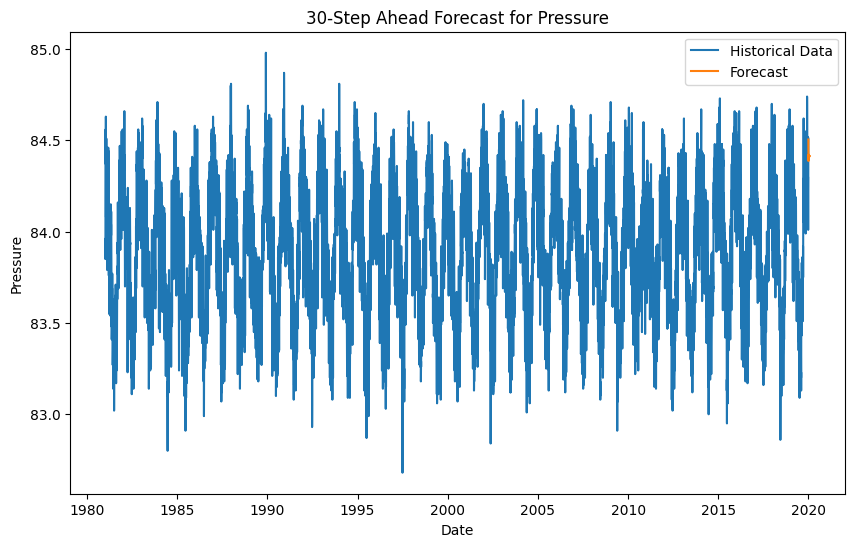

Forecasted values for Humidity_2m for the next 30 steps:
2020-01-01    3.155633
2020-01-02    3.172272
2020-01-03    3.183501
2020-01-04    3.196005
2020-01-05    3.207981
2020-01-06    3.208778
2020-01-07    3.203826
2020-01-08    3.200066
2020-01-09    3.198530
2020-01-10    3.198541
2020-01-11    3.199447
2020-01-12    3.200332
2020-01-13    3.200685
2020-01-14    3.200610
2020-01-15    3.200390
2020-01-16    3.200210
2020-01-17    3.200141
2020-01-18    3.200162
2020-01-19    3.200215
2020-01-20    3.200254
2020-01-21    3.200266
2020-01-22    3.200260
2020-01-23    3.200248
2020-01-24    3.200240
2020-01-25    3.200237
2020-01-26    3.200239
2020-01-27    3.200242
2020-01-28    3.200244
2020-01-29    3.200244
2020-01-30    3.200244
Freq: D, Name: predicted_mean, dtype: float64


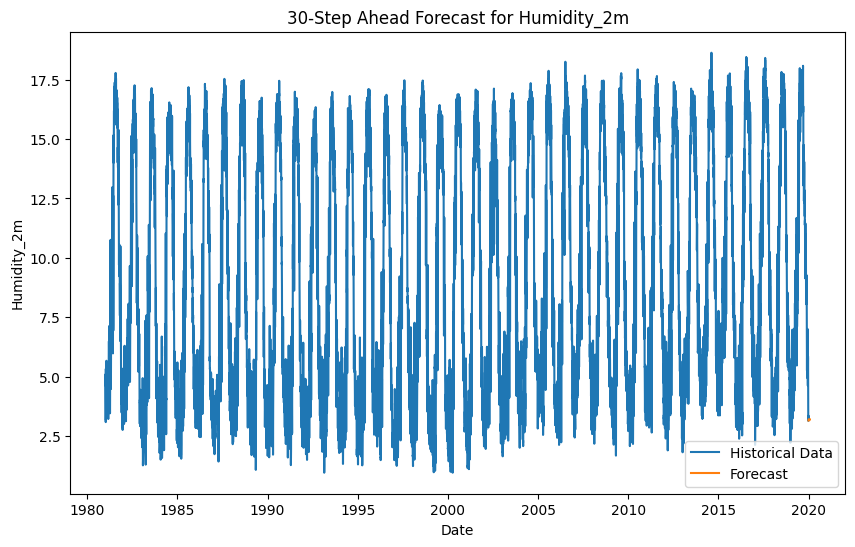

Forecasted values for TempRange_2m for the next 30 steps:
2020-01-01     9.884017
2020-01-02    10.272076
2020-01-03    10.551939
2020-01-04    10.297922
2020-01-05    10.213130
2020-01-06    10.099979
2020-01-07    10.161814
2020-01-08    10.208837
2020-01-09    10.234461
2020-01-10    10.218119
2020-01-11    10.205707
2020-01-12    10.196264
2020-01-13    10.200129
2020-01-14    10.204985
2020-01-15    10.207559
2020-01-16    10.206538
2020-01-17    10.205170
2020-01-18    10.204281
2020-01-19    10.204508
2020-01-20    10.204976
2020-01-21    10.205243
2020-01-22    10.205187
2020-01-23    10.205051
2020-01-24    10.204963
2020-01-25    10.204973
2020-01-26    10.205016
2020-01-27    10.205044
2020-01-28    10.205042
2020-01-29    10.205029
2020-01-30    10.205020
Freq: D, Name: predicted_mean, dtype: float64


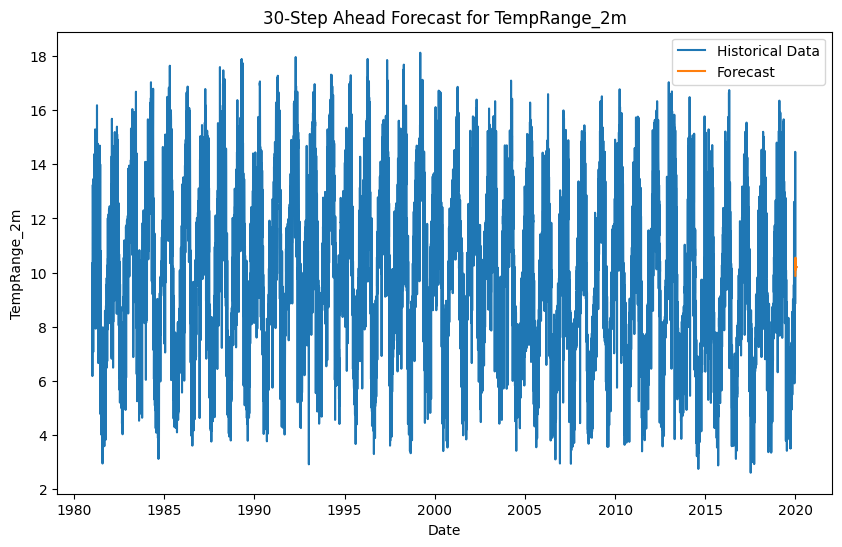

Forecasted values for WindSpeed_10m for the next 30 steps:
2020-01-01    1.660940
2020-01-02    1.720350
2020-01-03    1.741679
2020-01-04    1.701360
2020-01-05    1.681059
2020-01-06    1.675095
2020-01-07    1.688000
2020-01-08    1.695790
2020-01-09    1.697181
2020-01-10    1.692769
2020-01-11    1.690130
2020-01-12    1.689775
2020-01-13    1.691241
2020-01-14    1.692186
2020-01-15    1.692258
2020-01-16    1.691751
2020-01-17    1.691433
2020-01-18    1.691420
2020-01-19    1.691592
2020-01-20    1.691702
2020-01-21    1.691702
2020-01-22    1.691643
2020-01-23    1.691606
2020-01-24    1.691607
2020-01-25    1.691627
2020-01-26    1.691640
2020-01-27    1.691639
2020-01-28    1.691632
2020-01-29    1.691628
2020-01-30    1.691628
Freq: D, Name: predicted_mean, dtype: float64


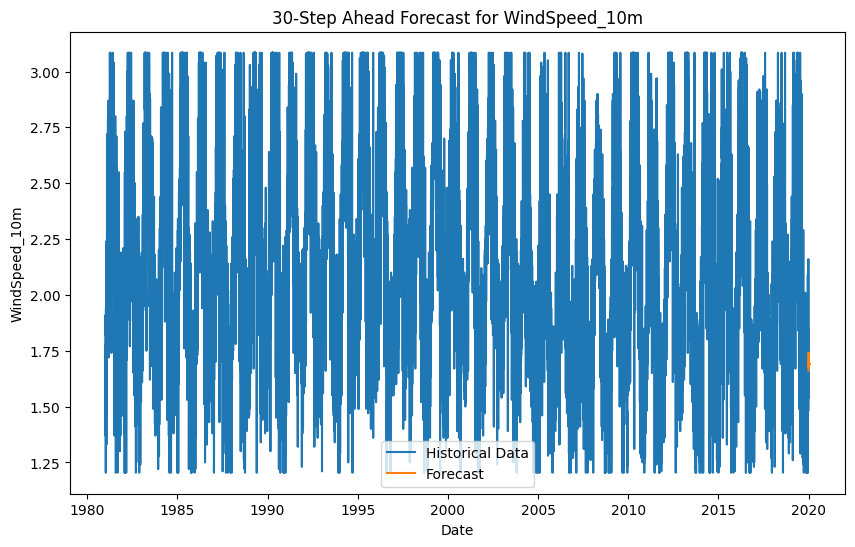

Forecasted values for MinWindSpeed_10m for the next 30 steps:
2020-01-01    0.548777
2020-01-02    0.631870
2020-01-03    0.603817
2020-01-04    0.564666
2020-01-05    0.520619
2020-01-06    0.519065
2020-01-07    0.552994
2020-01-08    0.562820
2020-01-09    0.557007
2020-01-10    0.549131
2020-01-11    0.544675
2020-01-12    0.546592
2020-01-13    0.550782
2020-01-14    0.551678
2020-01-15    0.550504
2020-01-16    0.549302
2020-01-17    0.548966
2020-01-18    0.549436
2020-01-19    0.549947
2020-01-20    0.549984
2020-01-21    0.549775
2020-01-22    0.549617
2020-01-23    0.549612
2020-01-24    0.549696
2020-01-25    0.549755
2020-01-26    0.549746
2020-01-27    0.549713
2020-01-28    0.549695
2020-01-29    0.549700
2020-01-30    0.549713
Freq: D, Name: predicted_mean, dtype: float64


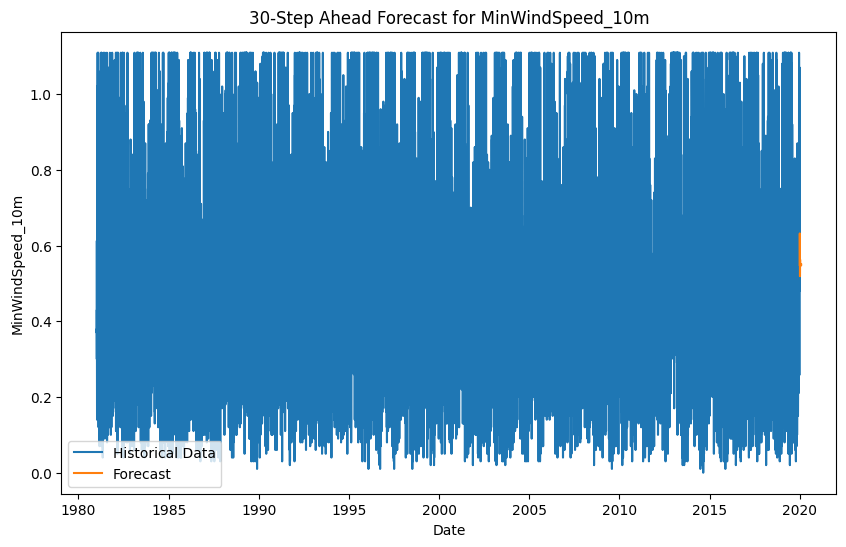

Forecasted values for Log_Sqrt_Precip for the next 30 steps:
2020-01-01   -1.606283e-36
2020-01-02   -8.355988e-37
2020-01-03   -4.410642e-37
2020-01-04   -4.348190e-37
2020-01-05   -5.000806e-37
2020-01-06   -5.043533e-37
2020-01-07   -6.345827e-37
2020-01-08   -6.380756e-37
2020-01-09   -5.814902e-37
2020-01-10   -5.548164e-37
2020-01-11   -5.590368e-37
2020-01-12   -5.641373e-37
2020-01-13   -5.758603e-37
2020-01-14   -5.814305e-37
2020-01-15   -5.774991e-37
2020-01-16   -5.724775e-37
2020-01-17   -5.712754e-37
2020-01-18   -5.719231e-37
2020-01-19   -5.732755e-37
2020-01-20   -5.742679e-37
2020-01-21   -5.742169e-37
2020-01-22   -5.736198e-37
2020-01-23   -5.732584e-37
2020-01-24   -5.732432e-37
2020-01-25   -5.733970e-37
2020-01-26   -5.735483e-37
2020-01-27   -5.735919e-37
2020-01-28   -5.735403e-37
2020-01-29   -5.734803e-37
2020-01-30   -5.734600e-37
Freq: D, Name: predicted_mean, dtype: float64


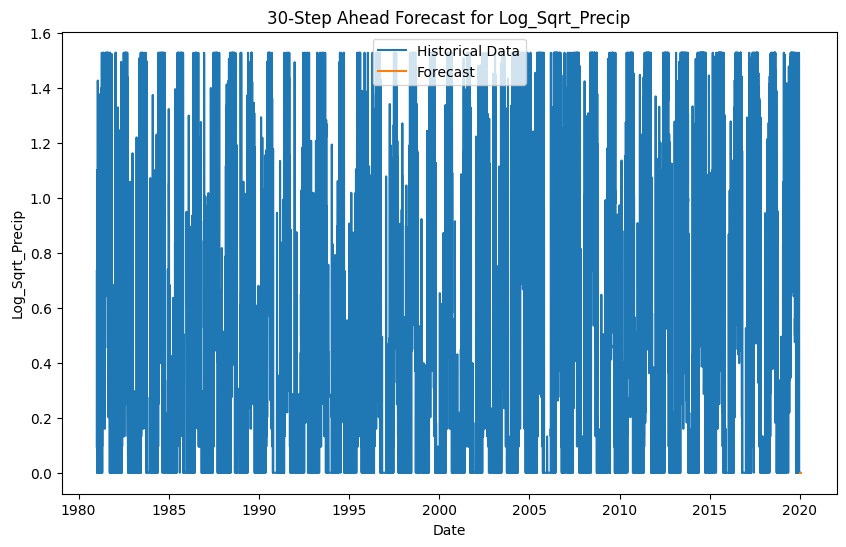

Forecasts for all target variables:
Pressure forecast:
2020-01-01    84.504762
2020-01-02    84.422196
2020-01-03    84.386953
2020-01-04    84.395167
2020-01-05    84.402843
2020-01-06    84.409860
2020-01-07    84.419437
2020-01-08    84.421853
2020-01-09    84.417006
2020-01-10    84.413061
2020-01-11    84.412391
2020-01-12    84.412811
2020-01-13    84.413470
2020-01-14    84.414299
2020-01-15    84.414694
2020-01-16    84.414480
2020-01-17    84.414141
2020-01-18    84.413989
2020-01-19    84.413978
2020-01-20    84.414024
2020-01-21    84.414095
2020-01-22    84.414142
2020-01-23    84.414141
2020-01-24    84.414117
2020-01-25    84.414099
2020-01-26    84.414093
2020-01-27    84.414095
2020-01-28    84.414100
2020-01-29    84.414105
2020-01-30    84.414106
Freq: D, Name: predicted_mean, dtype: float64
Humidity_2m forecast:
2020-01-01    3.155633
2020-01-02    3.172272
2020-01-03    3.183501
2020-01-04    3.196005
2020-01-05    3.207981
2020-01-06    3.208778
2020-01-07    3.203

In [48]:
# Assuming your DataFrame is named df and the target columns are defined
target_vars = ['Pressure', 'Humidity_2m', 'TempRange_2m', 'WindSpeed_10m', 'MinWindSpeed_10m', 'Log_Sqrt_Precip']

# Define the number of steps ahead to forecast
forecast_steps = 30  # For example, forecast the next 30 days

# Store the forecasts for each target variable
forecasts = {}

# Train and forecast for each target variable
for target in target_vars:
    # Train ARIMA model on the full dataset for the current target variable
    model = ARIMA(df[target], order=(5, 1, 0))  # Adjust the order as needed
    model_fit = model.fit()

    # Forecast future values
    forecast = model_fit.forecast(steps=forecast_steps)
    forecasts[target] = forecast

    # Print the forecasted values
    print(f"Forecasted values for {target} for the next {forecast_steps} steps:")
    print(forecast)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df[target], label='Historical Data')
    plt.plot(pd.date_range(df.index[-1], periods=forecast_steps, freq='D'), forecast, label='Forecast')
    plt.legend()
    plt.title(f'{forecast_steps}-Step Ahead Forecast for {target}')
    plt.xlabel('Date')
    plt.ylabel(target)
    plt.show()

# Print the forecasts dictionary
print("Forecasts for all target variables:")
for target, forecast in forecasts.items():
    print(f"{target} forecast:")
    print(forecast)